# Example of using the IDR web API

OMERO.web uses a default session backend authentication scheme for authentication.
First create a HTTP session using the [`requests`](http://docs.python-requests.org/en/master/) library:

In [1]:
import requests

INDEX_PAGE = "https://idr.openmicroscopy.org/webclient/?experimenter=-1"

# create http session
with requests.Session() as session:
    request = requests.Request('GET', INDEX_PAGE)
    prepped = session.prepare_request(request)
    response = session.send(prepped)
    if response.status_code != 200:
        response.raise_for_status()

# Studies:

## Get Study map annotation:

In [2]:
# initial data
screen_id = 102

In [3]:
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={screen_id}"

qs = {'type': 'screen', 'screen_id': screen_id}
url = MAP_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

(u'Study Type', u'high content screen')
(u'Screen Type', u'primary screen')
(u'Screen Technology Type', u'RNAi screen')
(u'Imaging Method', u'fluorescence microscopy')
(u'Publication Title', u'Integration of biological data by kernels on graph nodes allows prediction of new genes involved in mitotic chromosome condensation.')
(u'Publication Authors', u'Heriche JK, Lees JG, Morilla I, Walter T, Petrova B, Roberti MJ, Hossain MJ, Adler P, Fernandez JM, Krallinger M, Haering CH, Vilo J, Valencia A, Ranea JA, Orengo C, Ellenberg J.')
(u'PubMed ID', u'24943848 http://www.ncbi.nlm.nih.gov/pubmed/24943848')
(u'PMC ID', u'PMC4142622 http://europepmc.org/search?query=PMC4142622')
(u'Publication DOI', u'10.1091/mbc.E13-04-0221 http://dx.doi.org/10.1091/mbc.E13-04-0221')
(u'Annotation File', u'idr0002-screenA-annotation.csv https://github.com/IDR/idr-metadata/blob/master/idr0002-heriche-condensation/screenA/idr0002-screenA-annotation.csv')


## Get Plates in the given Screen:

In [14]:
PLATES_URL = "https://idr.openmicroscopy.org/webclient/api/plates/?id={screen_id}"

qs = {'screen_id': screen_id}
url = PLATES_URL.format(**qs)
for p in len(image_ids)['plates']:
    plate_id = p['id']
    print("Plate: {id}, Name: {name}, Children: {childCount}".format(**p))

Plate: 422, Name: plate1_1_013, Children: 1
Plate: 492, Name: plate1_2_006, Children: 1
Plate: 559, Name: plate1_3_003, Children: 1
Plate: 620, Name: plate1_7_015, Children: 1
Plate: 680, Name: plate2_2_007, Children: 1
Plate: 728, Name: plate2_3_018, Children: 1
Plate: 800, Name: plate2_5_015, Children: 1
Plate: 869, Name: plate2_7_028, Children: 1
Plate: 944, Name: plate3_11_007, Children: 1
Plate: 1015, Name: plate3_4_034, Children: 1
Plate: 1072, Name: plate3_5_002, Children: 1
Plate: 4554, Name: plate3_8_010, Children: 1


## Get PlateGrid:

In [20]:
WELLS_IMAGES_URL = "https://idr.openmicroscopy.org/webgateway/plate/{plate_id}/{field}/"

qs = {'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
rowlabels = grid['rowlabels']
collabels = grid['collabels']
for row in grid['grid']:
    for cell in row:
        if cell is not None:
            print("Well: {wellId}, Image: {id}".format(**cell))


Well: 1046859, Image: 1938559
Well: 1046944, Image: 1938650
Well: 1046877, Image: 1938583
Well: 1046904, Image: 1938610
Well: 1046910, Image: 1938616
Well: 1046869, Image: 1938575
Well: 1046864, Image: 1938570
Well: 1046940, Image: 1938646
Well: 1046930, Image: 1938636
Well: 1046853, Image: 1938560
Well: 1046920, Image: 1938626
Well: 1046863, Image: 1938569
Well: 1046890, Image: 1938596
Well: 1046889, Image: 1938595
Well: 1046942, Image: 1938648
Well: 1046915, Image: 1938621
Well: 1046934, Image: 1938640
Well: 1046880, Image: 1938586
Well: 1046881, Image: 1938587
Well: 1046919, Image: 1938625
Well: 1046870, Image: 1938576
Well: 1046947, Image: 1938653
Well: 1046892, Image: 1938598
Well: 1046856, Image: 1938563
Well: 1046900, Image: 1938606
Well: 1046901, Image: 1938607
Well: 1046945, Image: 1938651
Well: 1046873, Image: 1938579
Well: 1046936, Image: 1938642
Well: 1046908, Image: 1938614
Well: 1046897, Image: 1938603
Well: 1046867, Image: 1938573
Well: 1046865, Image: 1938571
Well: 1046

## Get Image Thumbnail:



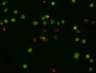

In [58]:
WELLS_IMAGES_URL = "https://idr.openmicroscopy.org/webgateway/plate/{plate_id}/{field}/"

qs = {'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
image_ids = [cell['id']  for row in grid['grid'] for cell in row if cell is not None]

THUMBNAILS_URL = "http://idr.openmicroscopy.org/webgateway/get_thumbnails/"
batch = image_ids[:10]
payload = {'id': batch}
print session.get(THUMBNAILS_URL, params=payload).json()[str(batch[0])]
    

## Get Image:

In [59]:
qs = {'image_id': image_id}
IMAGE_DETAILS_URL = "https://idr.openmicroscopy.org/webclient/imgData/{image_id}/"
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
if r.status_code == 200:
    print (r.json())


{u'init_zoom': 0, u'tiles': False, u'perms': {u'canAnnotate': False, u'canEdit': False, u'canDelete': False, u'canLink': False}, u'split_channel': {u'c': {u'width': 2694, u'border': 2, u'gridy': 2, u'gridx': 2, u'height': 2054}, u'g': {u'width': 2694, u'border': 2, u'gridy': 1, u'gridx': 2, u'height': 1028}}, u'rdefs': {u'defaultT': 0, u'model': u'color', u'defaultZ': 0, u'invertAxis': False, u'projection': u'normal'}, u'pixel_range': [0, 65535], u'interpolate': True, u'channels': [{u'color': u'FF0000', u'active': True, u'window': {u'max': 4095.0, u'min': 169.0, u'end': 4095.0, u'start': 169.0}, u'emissionWave': None, u'label': u'Cy3'}, {u'color': u'00FF00', u'active': True, u'window': {u'max': 4095.0, u'min': 313.0, u'end': 4095.0, u'start': 313.0}, u'emissionWave': None, u'label': u'eGFP'}], u'meta': {u'projectDescription': u'', u'datasetName': u'Multiple', u'projectId': None, u'wellSampleId': 1742577, u'projectName': u'Multiple', u'imageDescription': u'', u'imageId': 1938578, u'imag

## Get Image map annotation:

In [60]:
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={image_id}"

qs = {'type': 'image', 'image_id': image_id}
url = MAP_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

(u'Gene Identifier', u'')
(u'Gene Symbol', u'')
(u'siRNA Identifier', u'')
(u'siRNA Pool Identifier', u'')
(u'Control Type', u'empty well')
(u'Quality Control', u'fail')
(u'Channels', u'H2B- mCherry/Cy3:chromatin;eGFP:nuclear lamina and report on nuclear envelope breakdown')


## Get bulk annotation:

In [61]:
BULK_URL = "https://idr.openmicroscopy.org/webgateway/table/Screen.plateLinks.child.wells/{well_id}/query/?query=Well-{well_id}"

qs = {'well_id': well_id}
url = BULK_URL.format(**qs)
r = session.get(url)
print (r.json())


# or download entire bulk_annotation file:

FILEANNOTATION_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=file&screen={screen_id}"
DOWNLOAD_URL = "http://idr-clone.openmicroscopy.org/webclient/annotation/{ann_id}"

qs = {'screen_id': screen_id}
url = FILEANNOTATION_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    ann_id = a['id']
    qs2 = {'ann_id':  a['id']}
    url2 = DOWNLOAD_URL.format(**qs2)
    print ("Download URL:", url2)

{u'parentId': 102, u'addedBy': u'Demo User', u'parentType': u'Screen', u'annId': 6621611, u'owner': u'Demo User', u'data': {u'rows': [[4554, u'96', 1046872, u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'empty well', u'', u'fail', u'H2B- mCherry/Cy3:chromatin;eGFP:nuclear lamina and report on nuclear envelope breakdown', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'plate3_8_010', u'h12']], u'descriptions': [u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u''], u'columns': [u'Plate', u'Well Number', u'Well', u'Characteristics [Organism]', u'Term Source 1 REF', u'Term Source 1 Accession', u'Characteristics [Cell Line]', u'Term Source 2 REF', u'Term Source 2 Accession', u'siRNA Identifier', u'Sense Sequence', u'Antisense Sequence', u'Reagent Design Gene Annotation Build', u'Gene Identifier', u'Gene Symbol', 

# Attributes (e.g. Gene, Phenotype...)

## Get Screens that are annotated with gene:

In [62]:
SCREENS_PROJECTS_URL = "https://idr.openmicroscopy.org/mapr/api/{key}/?value={value}"

qs = {'key': 'gene', 'value': 'CDC20'}
url = SCREENS_PROJECTS_URL.format(**qs)
for s in session.get(url).json()['screens']:
    screen_id = s['id']
    print (s['id'], s['name'])

(102, u'idr0002-heriche-condensation/screenA (24)')
(51, u'idr0003-breker-plasticity/screenA (15)')
(253, u'idr0006-fong-nuclearbodies/screenA (48)')
(201, u'idr0007-srikumar-sumo/screenA (9)')
(251, u'idr0009-simpson-secretion/screenA (12)')
(1351, u'idr0010-doil-dnadamage/screenA (4)')
(1551, u'idr0011-ledesmafernandez-dad4/screenB (13)')
(1602, u'idr0011-ledesmafernandez-dad4/screenD (21)')
(1202, u'idr0012-fuchs-cellmorph/screenA (2)')
(1101, u'idr0013-neumann-mitocheck/screenA (6)')
(1302, u'idr0013-neumann-mitocheck/screenB (8)')
(1204, u'idr0020-barr-chtog/screenA (120)')


## Get Plates in Screen that are annotated with gene:

In [63]:
PLATES_URL = "https://idr.openmicroscopy.org/mapr/api/{key}/plates/?value={value}&id={screen_id}"

qs = {'key': 'gene', 'value': 'CDC20', 'screen_id': screen_id}
url = PLATES_URL.format(**qs)
for p in session.get(url).json()['plates']:
    plate_id = p['id']
    print (p['id'], p['name'])

(4357, u'200972429 TOG[2702]')
(4401, u'200972430 TOG[2703]')
(4451, u'200972431 NS[2667]')
(4453, u'200972432 NS[2668]')


## Get Images in Plate that are annotated with gene:

In [64]:
IMAGES_URL = "https://idr.openmicroscopy.org/mapr/api/{key}/images/?value={value}&node={parent_type}&id={parent_id}"

IMAGE_URL = "https://idr.openmicroscopy.org/webclient/?show=image-{image_id}"
IMAGE_VIEWER = "https://idr.openmicroscopy.org/webclient/img_detail/{image_id}/"
THUMBNAIL_URL = "https://idr.openmicroscopy.org/webclient/render_thumbnail/{image_id}/"
ATTRIBUTES_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&image={image_id}"

qs = {'key': 'gene', 'value': 'CDC20', 'parent_type': 'plate', 'parent_id': plate_id}
url = IMAGES_URL.format(**qs)
for i in session.get(url).json()['images']:
    image_id = i['id']
    print 'Image link:', IMAGE_URL.format(**{'image_id': image_id})
    print 'Image viewer link:', IMAGE_VIEWER.format(**{'image_id': image_id})
    print 'Thumbnail URL:', THUMBNAIL_URL.format(**{'image_id': image_id})
    url = ATTRIBUTES_URL.format(**{'image_id': image_id})
    print 'Annotations:'
    for a in session.get(url).json()['annotations']:
        print '\t%s' % a['values']

Image link: https://idr.openmicroscopy.org/webclient/?show=image-1915895
Image viewer link: https://idr.openmicroscopy.org/webclient/img_detail/1915895/
Thumbnail URL: https://idr.openmicroscopy.org/webclient/render_thumbnail/1915895/
Annotations:
	[[u'Gene Identifier', u'991'], [u'Gene Identifier URL', u'http://www.ncbi.nlm.nih.gov/gene/991'], [u'Gene Symbol', u'CDC20'], [u'Gene Identifier URL', u'http://www.ncbi.nlm.nih.gov/gene/?term=991']]
	[[u'RefSeq Accession', u'NM_001255'], [u'RefSeq Accession URL', u'http://www.ncbi.nlm.nih.gov/nuccore/NM_001255'], [u'RefSeq GI Number', u'4557436']]
	[[u'Organism', u'Homo sapiens']]
	[[u'siRNA Pool Identifier', u'L-003225-00'], [u'siRNA Identifier', u'']]
	[[u'siRNA Sequences', u'CGGAAGACCUGCCGUUACA;GGGCCGAACUCCUGGCAAA;GAUCAAAGAGGGCAACUAC;CAGAACAGACUGAAAGUAC']]
	[[u'Cell Line', u'HeLa'], [u'shRNA', u'non-silencing shRNA'], [u'Channels', u'Hoescht: nuclei;Anti-Ser10 PhosphoHistone H3: mitotic nuclei;Anti-alpha-tubulin: microtubules;RFP: whole c